# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [121]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [29]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [78]:
url = 'http://api.openweathermap.org/data/2.5/weather?'
city = 'london'

city_url = url + 'appid=' + weather_api_key + '&q=' + city + '&units=metric'
city_url

'http://api.openweathermap.org/data/2.5/weather?appid=13abc5f4c93981b9e946bb7d0a71985a&q=london&units=metric'

In [79]:
city_weather = requests.get(city_url).json()
city_weather

{'coord': {'lon': -0.1257, 'lat': 51.5085},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': -2.38,
  'feels_like': -6.89,
  'temp_min': -4.42,
  'temp_max': -0.03,
  'pressure': 1019,
  'humidity': 84},
 'visibility': 10000,
 'wind': {'speed': 3.6, 'deg': 240},
 'clouds': {'all': 5},
 'dt': 1705640062,
 'sys': {'type': 2,
  'id': 2075535,
  'country': 'GB',
  'sunrise': 1705650977,
  'sunset': 1705681521},
 'timezone': 0,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

In [81]:
city_lat = city_weather['coord']['lat']
city_lng = city_weather['coord']['lon']
city_max_temp = city_weather['main']['temp_max']
city_humidity = city_weather['main']['humidity']
city_clouds = city_weather['clouds']['all']
city_wind = city_weather['wind']['speed']
city_country = city_weather['sys']['country']
city_date = city_weather['dt']
city_max_temp

-0.03

In [65]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + 'appid=' + weather_api_key + '&q=' + city + '&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | olonkinbyen
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | edinburgh of the seven seas
Processing Record 5 of Set 1 | taiohae
City not found. Skipping...
Processing Record 6 of Set 1 | kerikeri
Processing Record 7 of Set 1 | linxia chengguanzhen
Processing Record 8 of Set 1 | grytviken
Processing Record 9 of Set 1 | tobi village
City not found. Skipping...
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | santa vitoria do palmar
Processing Record 12 of Set 1 | akranes
Processing Record 13 of Set 1 | shiyan
Processing Record 14 of Set 1 | selkirk
Processing Record 15 of Set 1 | mawlaik
Processing Record 16 of Set 1 | bada
Processing Record 17 of Set 1 | alice springs
Processing Record 18 of Set 1 | waitangi
Processing Record 19 of Set 1 | klyuchi
Processing Record 20 of Set 1 | atafu village
Processing Rec

In [69]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [73]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,olonkinbyen,70.9221,-8.7187,-2.65,53,67,6.28,SJ,1705632615
1,albany,42.6001,-73.9662,-5.71,87,98,1.06,US,1705632390
2,port-aux-francais,-49.3500,70.2167,7.42,97,100,11.37,TF,1705632616
3,edinburgh of the seven seas,-37.0676,-12.3116,16.15,62,16,10.71,SH,1705632617
4,kerikeri,-35.2268,173.9474,27.73,79,85,1.79,NZ,1705632618


In [82]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [114]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,olonkinbyen,70.9221,-8.7187,-2.65,53,67,6.28,SJ,1705632615
1,albany,42.6001,-73.9662,-5.71,87,98,1.06,US,1705632390
2,port-aux-francais,-49.3500,70.2167,7.42,97,100,11.37,TF,1705632616
3,edinburgh of the seven seas,-37.0676,-12.3116,16.15,62,16,10.71,SH,1705632617
4,kerikeri,-35.2268,173.9474,27.73,79,85,1.79,NZ,1705632618


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [122]:
#Same dates across all points 
timestamp = city_data_df['Date'][0]
 
# Convert Unix timestamp to a readable string 
formatted_date = time.strftime('%Y-%m-%d', time.gmtime(timestamp))
formatted_date

'2024-01-19'

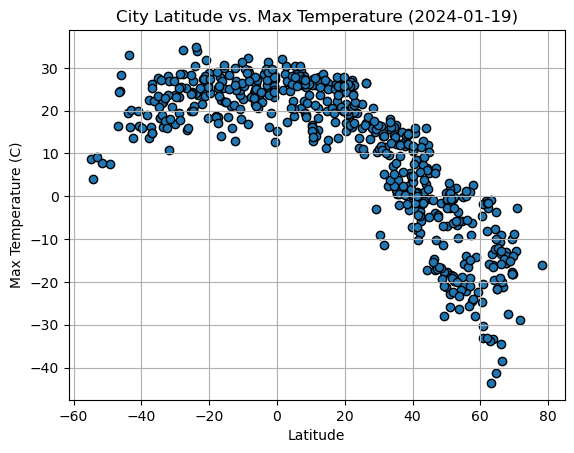

In [136]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o",facecolors="C0", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({formatted_date})")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

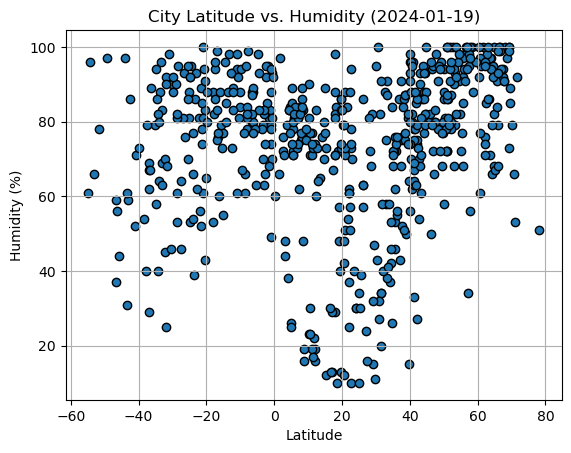

In [135]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o",facecolors="C0", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({formatted_date})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

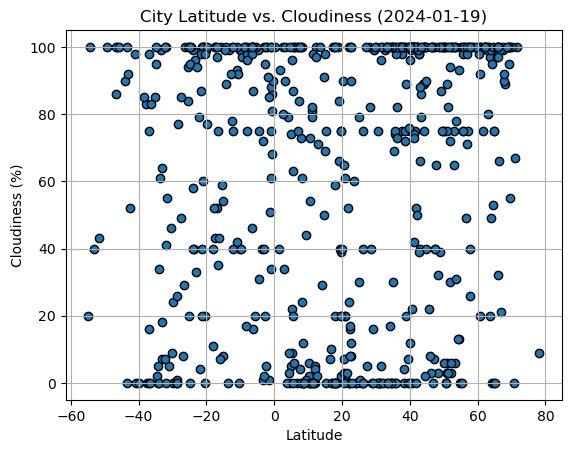

In [134]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o",facecolors="C0", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({formatted_date})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

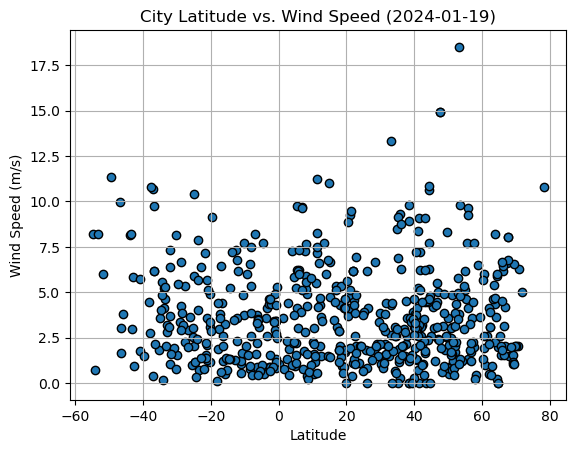

In [133]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o",facecolors="C0", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({formatted_date})")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [214]:
# Define a function to create Linear Regression plots
def linear_regress_plot(x, y, xlabel='', ylabel=''):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    annotate_x = np.median(x)
    annotate_y = np.median(y)

    print(f"The r-value is: {rvalue}")

    plt.scatter(x, y)
    plt.plot(x, regress_values,"red")
    plt.annotate(line_eq, (annotate_x, annotate_y), fontsize=15, color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [215]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,olonkinbyen,70.9221,-8.7187,-2.65,53,67,6.28,SJ,1705632615
1,albany,42.6001,-73.9662,-5.71,87,98,1.06,US,1705632390
5,linxia chengguanzhen,35.6003,103.2064,1.13,53,0,1.87,CN,1705632618
9,akranes,64.3218,-22.0749,-7.69,66,0,5.91,IS,1705632622
10,shiyan,32.6475,110.7781,2.39,88,99,1.49,CN,1705632623


In [216]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,port-aux-francais,-49.3500,70.2167,7.42,97,100,11.37,TF,1705632616
3,edinburgh of the seven seas,-37.0676,-12.3116,16.15,62,16,10.71,SH,1705632617
4,kerikeri,-35.2268,173.9474,27.73,79,85,1.79,NZ,1705632618
6,grytviken,-54.2811,-36.5092,3.97,96,100,0.72,GS,1705632619
7,ushuaia,-54.8000,-68.3000,8.81,61,20,8.23,AR,1705632498


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8791338839967067


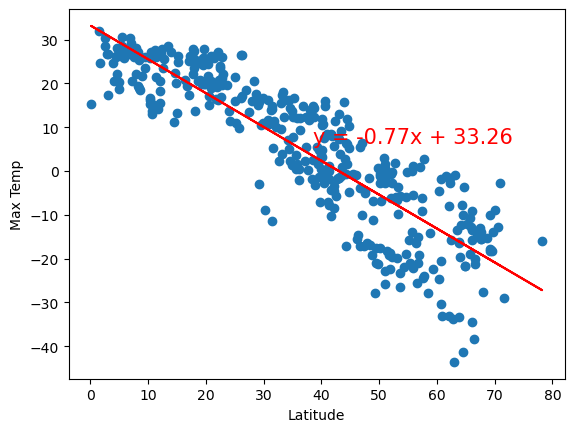

In [217]:
# Linear regression on Northern Hemisphere
linear_regress_plot(x=northern_hemi_df['Lat'], y=northern_hemi_df['Max Temp'], xlabel='Latitude', ylabel='Max Temp')

The r-value is: 0.4472434224010168


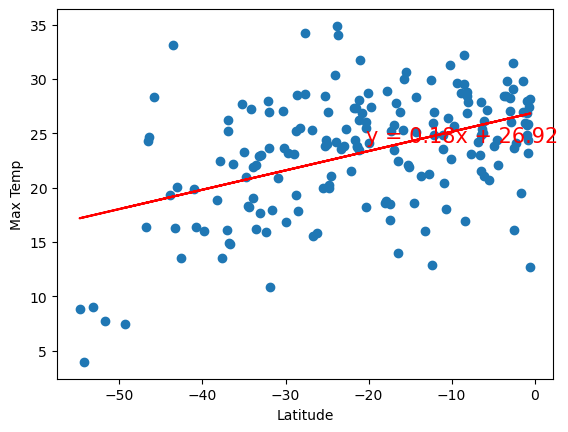

In [218]:
# Linear regression on Southern Hemisphere
linear_regress_plot(x=southern_hemi_df['Lat'], y=southern_hemi_df['Max Temp'], xlabel='Latitude', ylabel='Max Temp')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#For the cities in the Northern Hemisphere, there is a strong negative correlation (r = -0.88) for Max Temp vs. Lat on 2024-01-19
#For the cities in the Southern Hemisphere, there is an average positive correlation (r = 0.45) for Max Temp vs. Lat on 2024-01-19

#The linear regressions above are modeling the relationships between latitude and maximum temperature in both Northern and the Southern Hemisphere.

#Cities at higher latitudes in the Northern Hemisphere generally experience lower maximum temperatures.
#Cities at higher latitudes in the Southern Hemisphere generally experience higher maximum temperatures.

#In other words, cities closer to the equator has a tendency to have higher temperatures.

#As the correlations are relative strong, latitude is a strong predictor for max temperature. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.41859413629139947


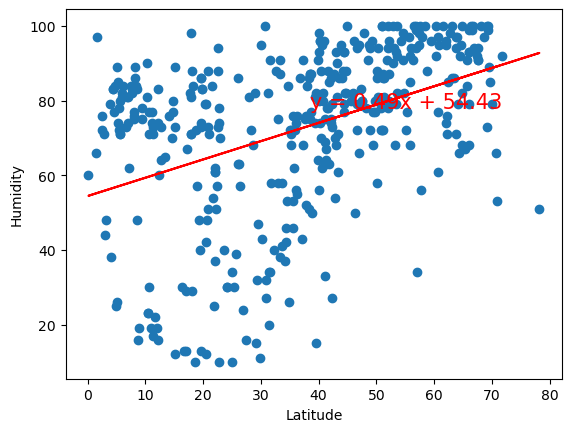

In [220]:
# Northern Hemisphere
linear_regress_plot(x=northern_hemi_df['Lat'], y=northern_hemi_df['Humidity'], xlabel='Latitude', ylabel='Humidity')

The r-value is: 0.3101648593936335


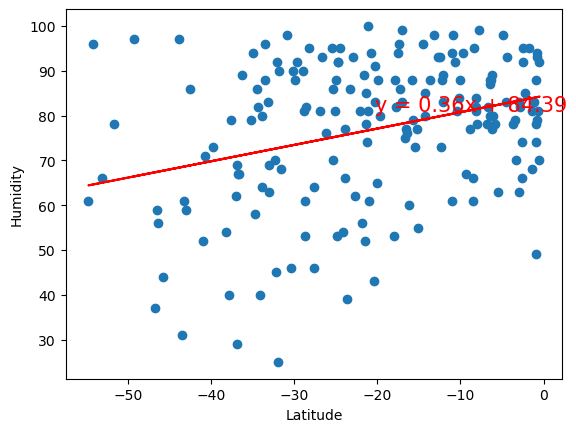

In [221]:
# Southern Hemisphere
linear_regress_plot(x=southern_hemi_df['Lat'], y=southern_hemi_df['Humidity'], xlabel='Latitude', ylabel='Humidity')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [240]:
#For the cities in the Northern Hemisphere, there is an average positive correlation (r = 0.42) for Humidity vs. Lat on 2024-01-19
#For the cities in the Southern Hemisphere, there is a weak positive correlation (r = 0.31) for Humidity vs. Lat on 2024-01-19

#The linear regressions above are modeling the relationships between latitude and humidity in both Northern and the Southern Hemisphere.

#On average, humidity levels tend to increase towards higher latitudes in the Nothern Hameisphere. 
#On average, humidity levels tend to increase towards higher latitudes in the Southern Hemisphere. 

#However, the correlations are not particularly strong. Therefore, latitude alone is not a strong predictor in humidity levels. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.29887767646070085


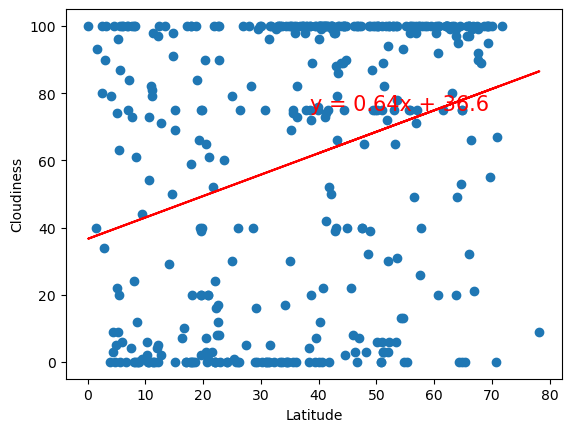

In [224]:
# Northern Hemisphere
linear_regress_plot(x=northern_hemi_df['Lat'], y=northern_hemi_df['Cloudiness'], xlabel='Latitude', ylabel='Cloudiness')

The r-value is: 0.1702844096657067


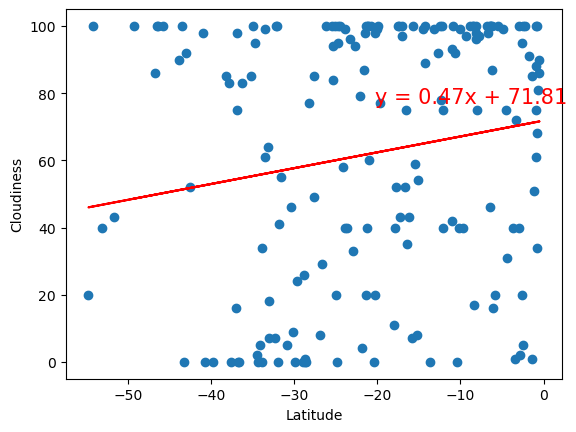

In [227]:
# Southern Hemisphere
linear_regress_plot(x=southern_hemi_df['Lat'], y=southern_hemi_df['Cloudiness'], xlabel='Latitude', ylabel='Cloudiness')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [239]:
#For the cities in the Northern Hemisphere, there is a weak positive correlation (r = 0.30) for Cloudiness vs. Lat on 2024-01-19
#For the cities in the Southern Hemisphere, there is a very weak positive correlation (r = 0.17) for Cloudiness vs. Lat on 2024-01-19

#The linear regressions above are modeling the relationships between latitude and cloudiness in both Northern and the Southern Hemisphere.

#There is a slight increase in cloudiness towards higher latitudes in the Nothern Hameisphere. 
#There is minimal increase in cloudiness towards higher latitudes in the Southern Hemisphere. 

#However, the correlations are weak. Therefore, latitude is a weak predictor in cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.011544597134425533


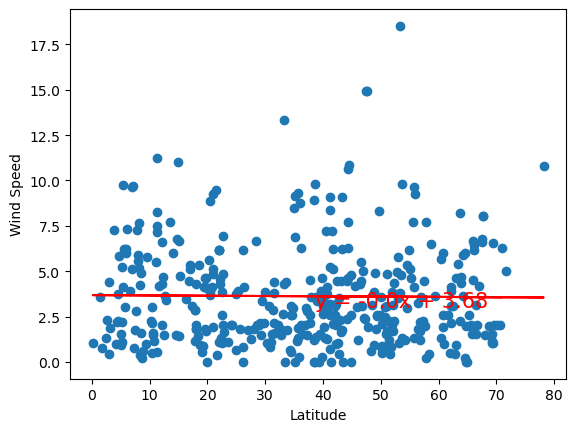

In [235]:
# Northern Hemisphere
linear_regress_plot(x=northern_hemi_df['Lat'], y=northern_hemi_df['Wind Speed'], xlabel='Latitude', ylabel='Wind Speed')

The r-value is: -0.27512930066702


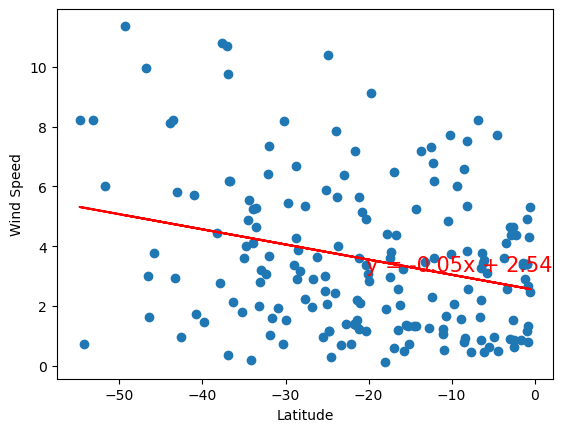

In [236]:
# Southern Hemisphere
linear_regress_plot(x=southern_hemi_df['Lat'], y=southern_hemi_df['Wind Speed'], xlabel='Latitude', ylabel='Wind Speed')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [242]:
#For the cities in the Northern Hemisphere, there is a very weak (almost no) negative correlation (r = -0.01) for Wind Speed vs. Lat on 2024-01-19
#For the cities in the Southern Hemisphere, there is a weak negative correlation (r = -0.28) for Wind Speed vs. Lat on 2024-01-19

#The linear regressions above are modeling the relationships between latitude and wind speed in both Northern and the Southern Hemisphere.

#There is little or no relationship between latitude and wind speed in the Nothern Hemisphere. 
#There is minimal decrease in wind speed towards higher latitudes in the Southern Hemisphere. 

#However, the correlations are weak or neglible. Therefore, latitude is a weak predcitor of wind speed. 